In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811611 sha256=38a3bc32b1d661811696bbc4c7277dc497cb14cc67e303a630e3ee702f26b18c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore,KNNBaseline, NormalPredictor
from surprise import SVD, SVDpp, BaselineOnly, NMF, SlopeOne, CoClustering, accuracy
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from datetime import datetime
import os
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Now, we add our dataset here. To do that we need to upload the csv file on google colab
from google.colab import files
uploaded = files.upload()

Saving attractions_new.csv to attractions_new.csv


In [ ]:
data_df = pd.read_csv('attractions_new.csv')
data_df.head()

,location_id,location_name,ratings,description,best time to visit,location_type,type_id,no. of ratings,user_id,state,Address,website_link,image_link
0,0,Leh Ladakh,4.6,Ladakh is a union territory in the Kashmir reg...,Jun to Sep,Hill Station,1,139,1,Jammu and Kashmir,"leh ladhak,jammu and kashmir,194101,india",lehladakhindia.com,https://www.holidify.com/images/bgImages/LADAK...
1,1,Srinagar,4.5,"Famously known as 'Heaven on Earth, Srinagar i...",April to October,City,2,126,3,Jammu and Kashmir,"srinagar,jammu and kashmir,190001,india",srinagar.nic.in,https://www.holidify.com/images/bgImages/SRIN...
2,2,Manali,4.5,"With spectacular valleys, breathtaking views, ...",October to June,Hill Station,1,466,3,Himachal Pradesh,"manali,himachal pradesh,175131,india",himachaltourism.gov.in,https://www.holidify.com/images/bgImages/MANA...
3,3,Coorg,4.2,Located amidst imposing mountains in Karnataka...,October to March,Hill Station,1,432,5,Karnataka,"coorg,karnataka,571201,india",coorgtourism.co.in,https://www.holidify.com/images/bgImages/COOR...
4,4,Andaman,4.5,Replete with turquoise blue water beaches and ...,October to Jun,Island,3,135,2,Andaman and Nicobar Islands,"andaman,andamana and nicobar,744209",andamans.gov.in,https://www.holidify.com/images/bgImages/ANDA...


In [ ]:
#df=data_df[['location_id','type_id','user_id','ratings','no. of rating']]
df=data_df[['location_id','type_id','ratings','no. of ratings']]
df.head()

,location_id,type_id,ratings,no. of ratings
0,0,1,4.6,139
1,1,2,4.5,126
2,2,1,4.5,466
3,3,1,4.2,432
4,4,3,4.5,135


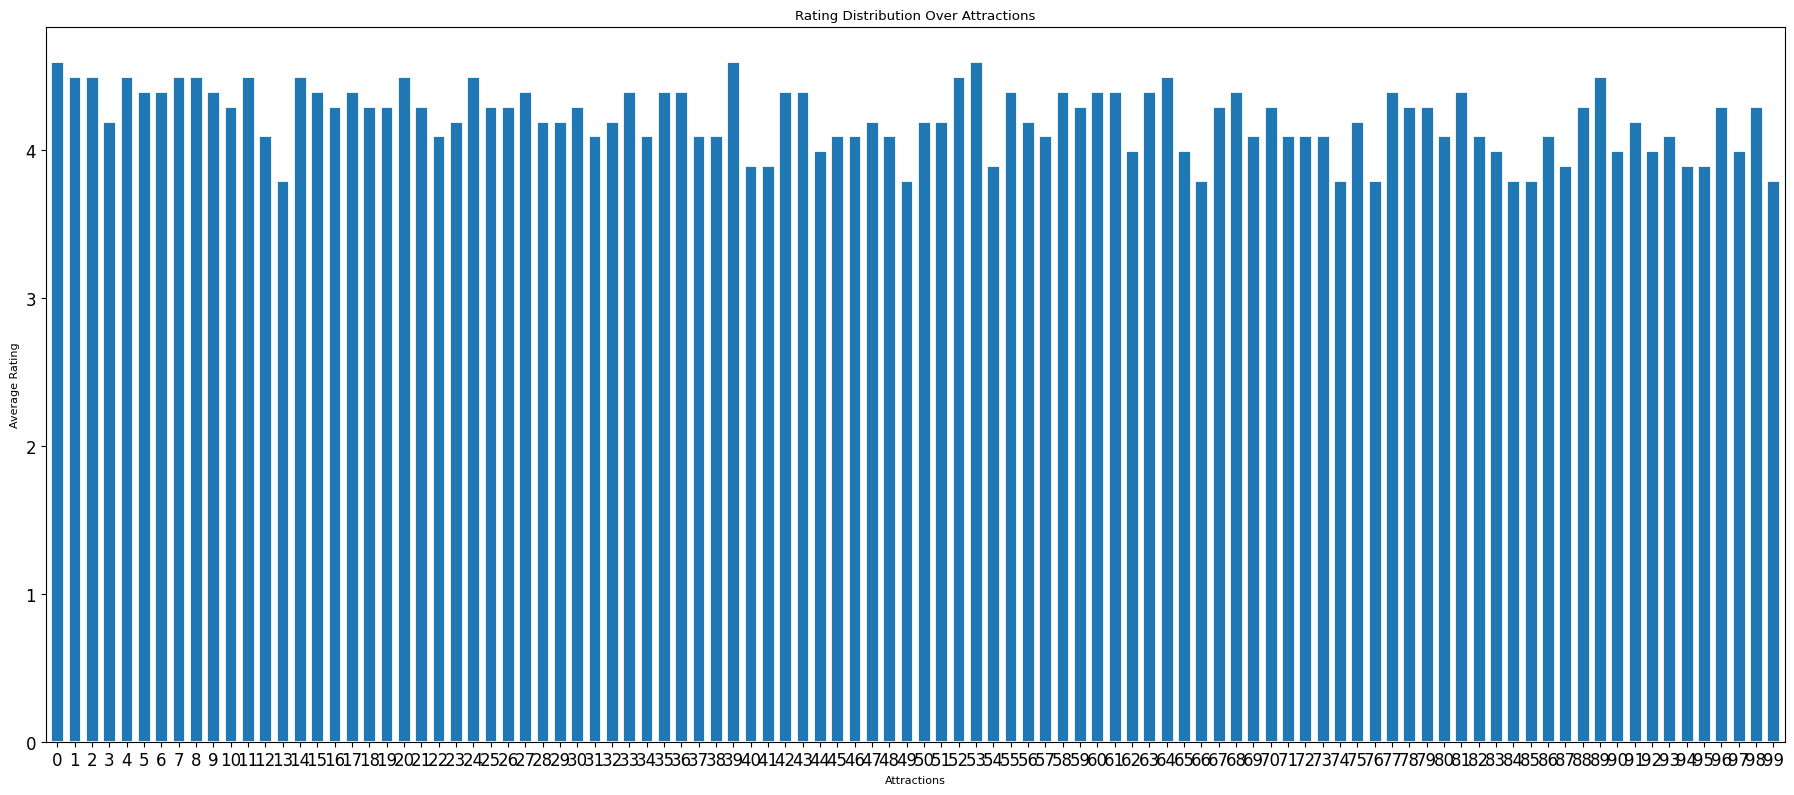

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
ax = df['ratings'].plot.bar(fontsize=12, xlabel='Attractions',
                            ylabel='Average Rating', width=0.8,rot=0,
                            figsize=(18,8),title="Rating Distribution Over Attractions",alpha=1,
                            edgecolor='white', linewidth=2)

plt.tight_layout()
plt.show(block=True)
import pylab as plot
params = {'legend.fontsize': 18,
          'legend.handlelength': 4}
plot.rcParams.update(params)

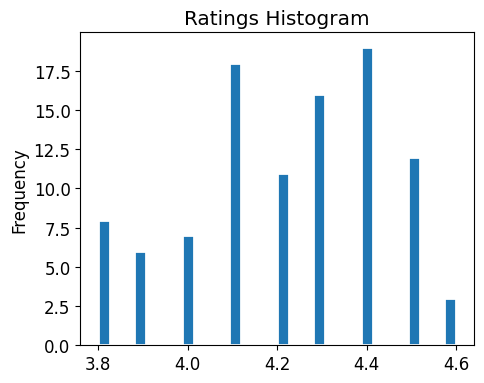

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
ax = df['ratings'].plot.hist(fontsize=12, xlabel='Attractions',
                            ylabel='Average Rating', rot=0,
                            figsize=(5,4),title="Ratings Histogram",alpha=1,
                            edgecolor='white', linewidth=2,bins=30)


plt.tight_layout()
plt.show(block=True)
import pylab as plot
params = {'legend.fontsize': 18,
          'legend.handlelength': 4}
plot.rcParams.update(params)

In [ ]:
# Use Reader class to parse the ratings.
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df[['type_id','location_id','ratings']], reader)


In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(),KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(),BaselineOnly(), CoClustering()]:
  # Perform cross validation
  results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=3, verbose=False,return_train_measures=True)
  # Get results & append algorithm name
  tmp = pd.DataFrame.from_dict(results).mean(axis=0)
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
  benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


<ipython-input-9-e6e77dd145cb>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
<ipython-input-9-e6e77dd145cb>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
<ipython-input-9-e6e77dd145cb>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
<ipython-input-9-e6e77dd145cb>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(

In [ ]:
print('3 Fold Cross Validation Result sorted based on Test_RMSE (ascending)\n')
surprise_results = pd.DataFrame(benchmark).set_index('fit_time').sort_values('test_rmse', ascending=True)
surprise_results

3 Fold Cross Validation Result sorted based on Test_RMSE (ascending)



,test_rmse,train_rmse,test_mae,train_mae,test_time,Algorithm
fit_time,,,,,,
0.000268,0.216580,0.192884,0.181998,0.162572,0.000177,BaselineOnly
0.000593,0.217807,0.000000,0.185008,0.000000,0.000182,KNNWithZScore
0.004360,0.218429,0.456856,0.183862,0.365667,0.000106,CoClustering
0.000103,0.220309,0.000000,0.185671,0.000000,0.000254,KNNBasic
0.001027,0.220719,0.000000,0.187307,0.000000,0.000311,KNNWithMeans
0.000152,0.220777,0.233822,0.188810,0.186068,0.000148,SlopeOne
0.003626,0.221055,0.193474,0.186826,0.162980,0.000168,NMF
0.001077,0.221460,0.163903,0.184941,0.133527,0.000329,SVD
0.002558,0.225767,0.170139,0.188750,0.141244,0.000132,SVDpp


In [ ]:
print('3 Fold Cross Validation Result sorted based on fit_time (ascending)\n')
#surprise_results = pd.DataFrame(benchmark).set_index('fit_time').sort_values('fit_time', ascending=True)
surprise_results = pd.DataFrame(benchmark).sort_values('fit_time', ascending=True)
surprise_results

3 Fold Cross Validation Result sorted based on fit_time (ascending)



,test_rmse,train_rmse,test_mae,train_mae,fit_time,test_time,Algorithm
4,0.308404,0.286409,0.259633,0.241154,0.000082,0.000111,NormalPredictor
6,0.220309,0.000000,0.185671,0.000000,0.000103,0.000254,KNNBasic
2,0.220777,0.233822,0.188810,0.186068,0.000152,0.000148,SlopeOne
9,0.216580,0.192884,0.181998,0.162572,0.000268,0.000177,BaselineOnly
5,0.226270,0.000000,0.191926,0.000000,0.000584,0.000167,KNNBaseline
8,0.217807,0.000000,0.185008,0.000000,0.000593,0.000182,KNNWithZScore
7,0.220719,0.000000,0.187307,0.000000,0.001027,0.000311,KNNWithMeans
0,0.221460,0.163903,0.184941,0.133527,0.001077,0.000329,SVD
1,0.225767,0.170139,0.188750,0.141244,0.002558,0.000132,SVDpp
3,0.221055,0.193474,0.186826,0.162980,0.003626,0.000168,NMF


In [ ]:
# Function to visualize the cross validation results to compared the models based on
# RSME/MAE and Test_Time/Fit_Time
def CV_Results_Visulaization(results,ye,yt,title,time):
  fig, ax1 = plt.subplots(figsize=(10, 7))
  plt.xticks(rotation=90)
  palette = sns.color_palette("RdBu", len(results))
  sns.barplot(x='Algorithm', y=ye, data=results, palette=palette, ax=ax1)
  ax1.set_title(title,fontsize = 12,fontweight='bold')
  ax2 = ax1.twinx()
  sns.scatterplot(x='Algorithm', y=yt, data=results, color='black', ax=ax2)
  ax2.set(ylim=(0, results[time].max() * 1.1))
  plt.show()

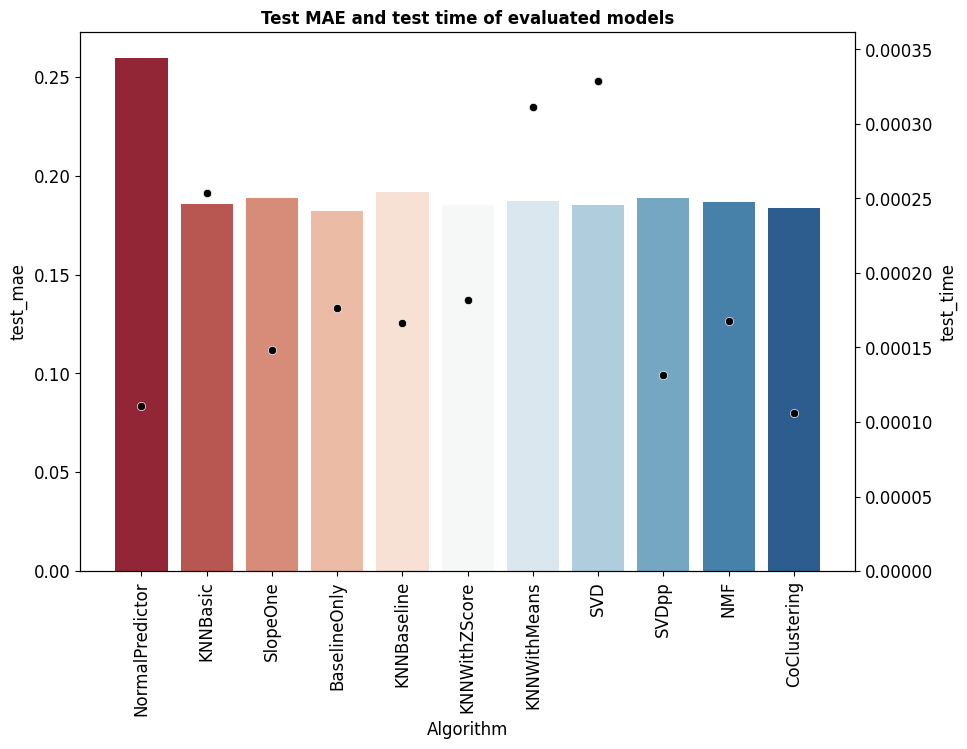

In [ ]:
title='Test MAE and test time of evaluated models'
ye='test_mae'
time='test_time'
yt='test_time'
CV_Results_Visulaization(surprise_results,ye,yt,title,time)

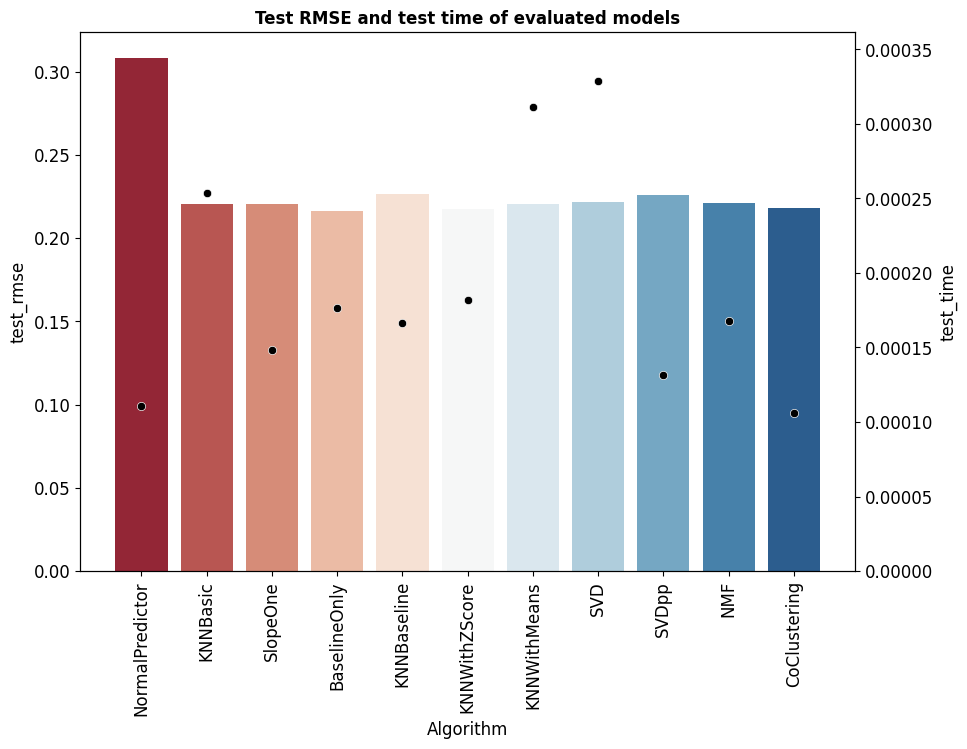

In [ ]:
title='Test RMSE and test time of evaluated models'
ye='test_rmse'
time='test_time'
yt='test_time'
CV_Results_Visulaization(surprise_results,ye,yt,title,time)

KNN Model Selection

In [ ]:
def generate_models_dict(models, sim_names, user_based):
    models_dict = {}

    for sim_name in sim_names:
        sim_dict = {
            'name': sim_name,
            'user_based': user_based
        }
        for model in models:
            model_name = get_model_name(model) + ' ' + sim_name
            models_dict[model_name] = model(sim_options=sim_dict)

    return models_dict

In [ ]:
def get_model_name(Algorithm):
    return str(Algorithm).split('.')[-1].split(' ')[0].replace("'>", "")

In [ ]:
def cv_multiple_models(data, models_dict, cv=3):
  results = pd.DataFrame()

  for model_name, Algorithm in models_dict.items():
      print('\n---> CV for %s...' % model_name)

      cv_results = cross_validate(Algorithm, data, cv=cv)
      tmp = pd.DataFrame(cv_results).mean()
      tmp['Algorithm'] = model_name
      results = results.append(tmp, ignore_index=True)

  return results

Item-Item Model Selection

In [ ]:
knn_models = generate_models_dict([KNNWithZScore], ['cosine', 'msd', 'pearson'], False)
knn_results = cv_multiple_models(data, knn_models)
knn_models = None
knn_results.sort_values('test_rmse', ascending=True)


---> CV for KNNWithZScore cosine...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithZScore msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithZScore pearson...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


<ipython-input-17-8335eb521651>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(tmp, ignore_index=True)
<ipython-input-17-8335eb521651>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(tmp, ignore_index=True)
<ipython-input-17-8335eb521651>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(tmp, ignore_index=True)


,test_rmse,test_mae,fit_time,test_time,Algorithm
0,0.216732,0.185156,0.003991,0.000249,KNNWithZScore cosine
2,0.217738,0.184372,0.002926,0.000173,KNNWithZScore pearson
1,0.219580,0.187221,0.005346,0.000402,KNNWithZScore msd


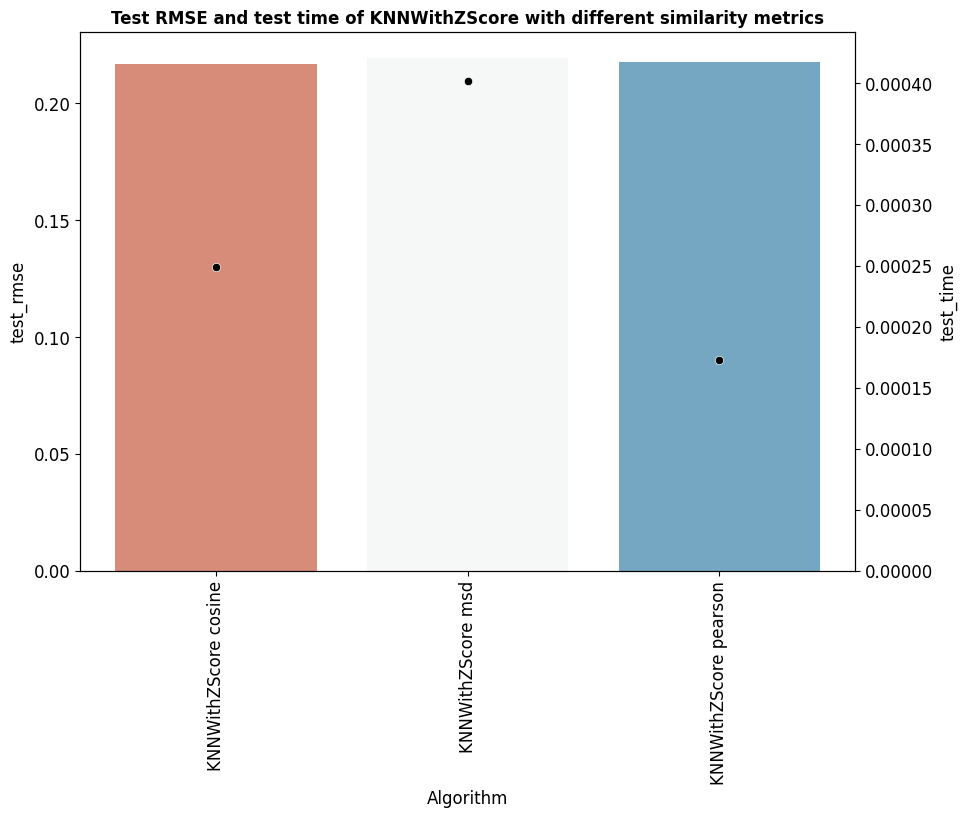

In [ ]:
title='Test RMSE and test time of KNNWithZScore with different similarity metrics'
ye='test_rmse'
time='test_time'
yt='test_time'
CV_Results_Visulaization(knn_results,ye,yt,title,time)

KNNWithZScore Model Optimisation with GridSearch CV

In [ ]:
param_grid = {'k': [40,45,50,55],
              'min_k': [1,3,5,8],
              'sim_options': {'name': ['pearson'],'min_support': [1, 5],'user_based': [False]}
              }
gridsearch = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=3)
gridsearch.fit(data)
print(gridsearch.best_score['rmse'])
print(gridsearch.best_params['rmse'])

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)
sim_options = {'name': 'pearson','user_based': False,'min_support': 1}
model = KNNWithZScore(k=40, min_k=1, sim_options=sim_options)
predictions = model.fit(trainset).test(testset)
accuracy.rmse(predictions)
print(model.__class__.__name__)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.2128
KNNWithZScore


In [ ]:
#trainset = data.build_full_trainset()
model = KNNWithZScore(k=40, min_k=1, sim_options=sim_options)
model.fit(trainset)
#testset = trainset.build_anti_testset()
predictions = model.test(testset)
accuracy.rmse(predictions)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.2128


0.2127826225151964

In [ ]:
def k_from_details(details):
    try:
        return details['actual_k']
    except KeyError:
        return 1000

In [ ]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'location_id', 'actual_rating', 'pred_rating', 'details'])
df_pred['k'] = df_pred['details'].apply(k_from_details)
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,location_id,actual_rating,pred_rating,k,impossible,pred_rating_round,abs_err
24,6,64,4.5,4.197333,1000,True,4.0,0.302667
16,1,7,4.5,4.197333,1000,True,4.0,0.302667
5,2,81,4.4,4.197333,1000,True,4.0,0.202667
20,1,56,4.2,4.197333,1000,True,4.0,0.002667
21,2,1,4.5,4.197333,1000,True,4.0,0.302667


In [ ]:
best_predictions = df_pred.sort_values(by='abs_err')[:10]
best_predictions

,user_id,location_id,actual_rating,pred_rating,k,impossible,pred_rating_round,abs_err
12,2,51,4.2,4.197333,1000,True,4.0,0.002667
20,1,56,4.2,4.197333,1000,True,4.0,0.002667
14,2,50,4.2,4.197333,1000,True,4.0,0.002667
11,2,28,4.2,4.197333,1000,True,4.0,0.002667
18,4,75,4.2,4.197333,1000,True,4.0,0.002667
1,2,37,4.1,4.197333,1000,True,4.0,0.097333
9,2,46,4.1,4.197333,1000,True,4.0,0.097333
8,1,21,4.3,4.197333,1000,True,4.0,0.102667
17,2,30,4.3,4.197333,1000,True,4.0,0.102667
3,2,67,4.3,4.197333,1000,True,4.0,0.102667


In [ ]:
worst_predictions = df_pred.sort_values(by='abs_err')[-10:]
worst_predictions

,user_id,location_id,actual_rating,pred_rating,k,impossible,pred_rating_round,abs_err
22,6,55,4.4,4.197333,1000,True,4.0,0.202667
19,1,9,4.4,4.197333,1000,True,4.0,0.202667
4,1,95,3.9,4.197333,1000,True,4.0,0.297333
21,2,1,4.5,4.197333,1000,True,4.0,0.302667
0,4,8,4.5,4.197333,1000,True,4.0,0.302667
15,7,52,4.5,4.197333,1000,True,4.0,0.302667
2,4,20,4.5,4.197333,1000,True,4.0,0.302667
16,1,7,4.5,4.197333,1000,True,4.0,0.302667
24,6,64,4.5,4.197333,1000,True,4.0,0.302667
6,7,49,3.8,4.197333,1000,True,4.0,0.397333


Distribution of actual and predicted ratings in the test set

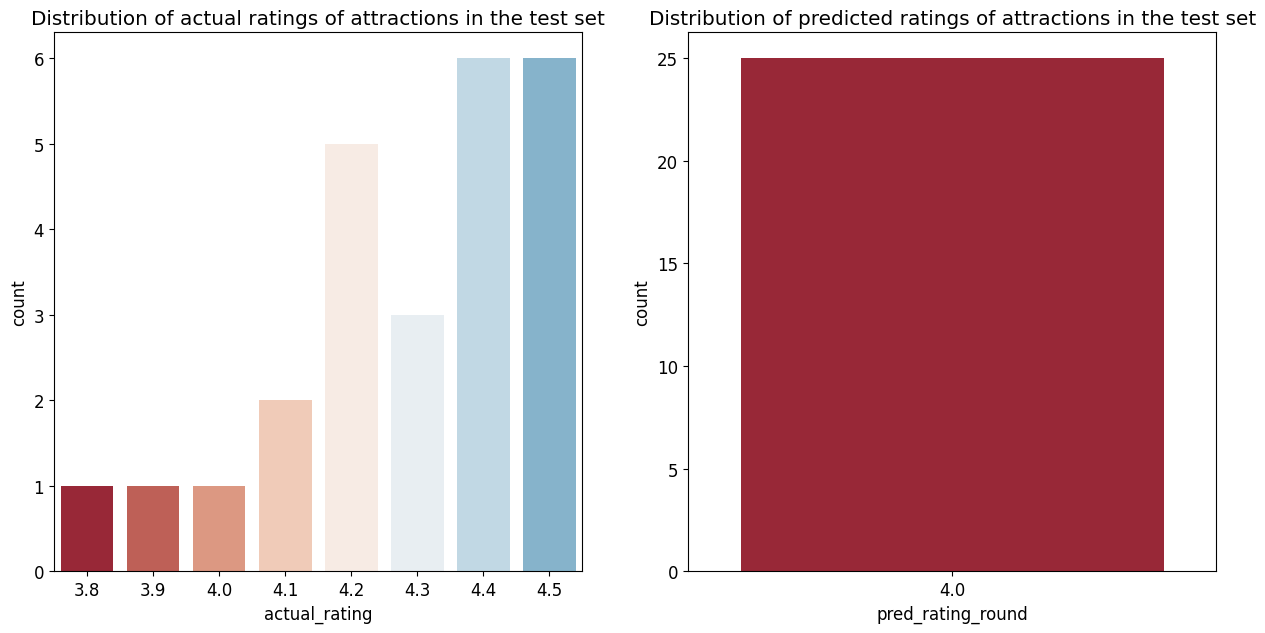

In [ ]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of attractions in the test set')
sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of attractions in the test set')
plt.show()

Absolute error of predicted ratings

<ipython-input-28-af97585021ae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)


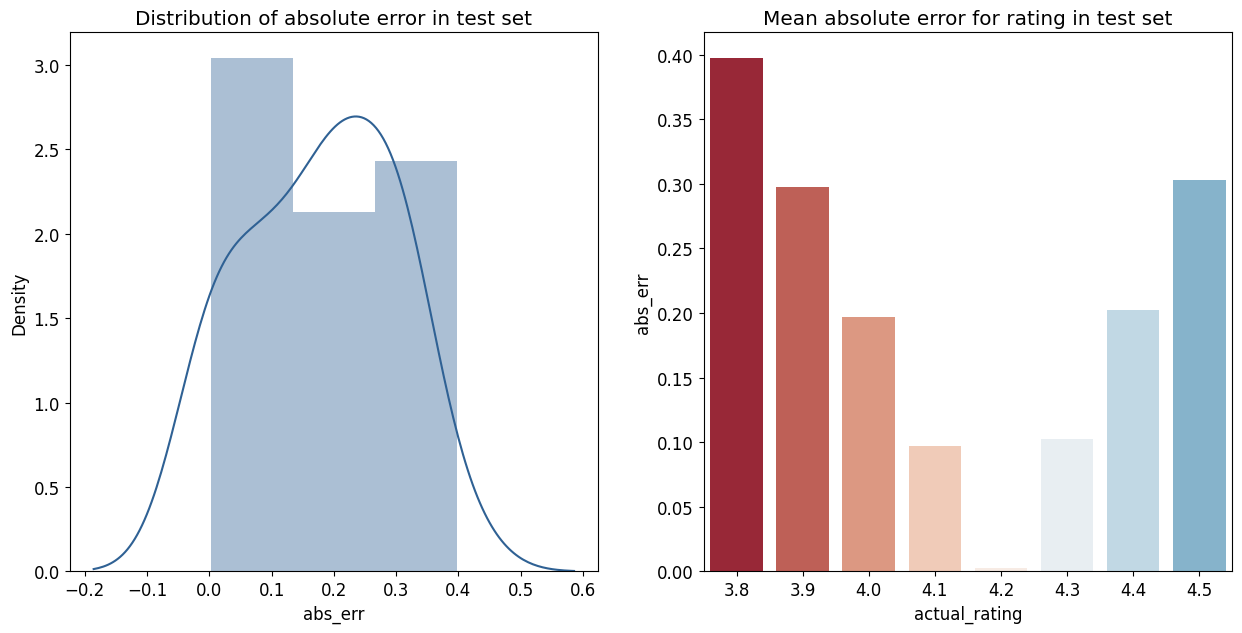

In [ ]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')
sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')
plt.show()

In [ ]:
def get_all_predictions(predictions):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

In [ ]:
trainset1 = data.build_full_trainset()
model = KNNWithZScore(k=40, min_k=1, sim_options=sim_options)
model.fit(trainset1)
testset1 = trainset.build_anti_testset()
predictions1 = model.test(testset1)
accuracy.rmse(predictions)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.2128


0.2127826225151964

In [ ]:
all_pred = get_all_predictions(predictions1)

In [ ]:
#To get top 5 reommendation
n = 5
for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [ ]:
#tmp = pd.DataFrame.from_dict(all_pred,orient='index')
tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()

In [ ]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

In [ ]:
#specifying the user
user_id= 4
results = get_predictions(user_id)
results

0    (53, 4.6)
1    (39, 4.6)
2     (0, 4.6)
3    (24, 4.5)
4     (2, 4.5)
Name: 4, dtype: object

In [ ]:
recommended_attraction_ids=[]
for x in range(0, n):
    recommended_attraction_ids.append(results[x][0])

recommended_attraction_ids

[53, 39, 0, 24, 2]

In [ ]:
attractions_df = pd.read_csv('attractions_new.csv')
attractions_df.head()

,location_id,location_name,ratings,description,best time to visit,location_type,type_id,no. of ratings,user_id,state,Address,website_link,image_link
0,0,Leh Ladakh,4.6,Ladakh is a union territory in the Kashmir reg...,Jun to Sep,Hill Station,1,139,1,Jammu and Kashmir,"leh ladhak,jammu and kashmir,194101,india",lehladakhindia.com,https://www.holidify.com/images/bgImages/LADAK...
1,1,Srinagar,4.5,"Famously known as 'Heaven on Earth, Srinagar i...",April to October,City,2,126,3,Jammu and Kashmir,"srinagar,jammu and kashmir,190001,india",srinagar.nic.in,https://www.holidify.com/images/bgImages/SRIN...
2,2,Manali,4.5,"With spectacular valleys, breathtaking views, ...",October to June,Hill Station,1,466,3,Himachal Pradesh,"manali,himachal pradesh,175131,india",himachaltourism.gov.in,https://www.holidify.com/images/bgImages/MANA...
3,3,Coorg,4.2,Located amidst imposing mountains in Karnataka...,October to March,Hill Station,1,432,5,Karnataka,"coorg,karnataka,571201,india",coorgtourism.co.in,https://www.holidify.com/images/bgImages/COOR...
4,4,Andaman,4.5,Replete with turquoise blue water beaches and ...,October to Jun,Island,3,135,2,Andaman and Nicobar Islands,"andaman,andamana and nicobar,744209",andamans.gov.in,https://www.holidify.com/images/bgImages/ANDA...


In [ ]:
attractions=attractions_df[['location_id','location_name','location_type','ratings','no. of ratings','type_id']]
attractions.head()

,location_id,location_name,location_type,ratings,no. of ratings,type_id
0,0,Leh Ladakh,Hill Station,4.6,139,1
1,1,Srinagar,City,4.5,126,2
2,2,Manali,Hill Station,4.5,466,1
3,3,Coorg,Hill Station,4.2,432,1
4,4,Andaman,Island,4.5,135,3


In [ ]:
#getting the title of the recommended attractions
recommended_attractions = attractions[attractions['location_id'].isin(recommended_attraction_ids)]
recommended_attractions

,location_id,location_name,location_type,ratings,no. of ratings,type_id
0,0,Leh Ladakh,Hill Station,4.6,139,1
2,2,Manali,Hill Station,4.5,466,1
24,24,Amarnath,Pilgrimage,4.5,41,6
39,39,Khajuraho,City,4.6,56,2
53,53,Gulmarg,Hill Station,4.6,83,1


In [ ]:
ratings_dict = {'attractionID': list(attractions_df.location_id),
                'typeID': list(attractions_df.type_id),
                'rating': list(attractions_df.ratings)}

df1 = pd.DataFrame(ratings_dict)
df1.head()

,attractionID,typeID,rating
0,0,1,4.6
1,1,2,4.5
2,2,1,4.5
3,3,1,4.2
4,4,3,4.5


In [ ]:
temp = df1[df1['typeID'] == 2].sort_values("rating", ascending = False)
temp.head()

,attractionID,typeID,rating
39,39,2,4.6
1,1,2,4.5
14,14,2,4.5
33,33,2,4.4
5,5,2,4.4


In [ ]:
history_attraction_ids = temp['attractionID']
user_history = attractions[attractions['location_id'].isin(history_attraction_ids)]

In [ ]:
user_history[:n]

,location_id,location_name,location_type,ratings,no. of ratings,type_id
1,1,Srinagar,City,4.5,126,2
5,5,Udaipur,City,4.4,263,2
14,14,Varanasi,City,4.5,165,2
15,15,Jaipur,City,4.4,287,2
16,16,Rishikesh,City,4.3,239,2
